# 1) Data Acquisition

In [ ]:
!kaggle datasets download quora/question-pairs-dataset

Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
 43% 9.00M/20.8M [00:00<00:00, 20.6MB/s]
100% 20.8M/20.8M [00:00<00:00, 45.9MB/s]


In [ ]:
!unzip question-pairs-dataset.zip

Archive:  question-pairs-dataset.zip
  inflating: questions.csv           


In [ ]:
!rm -rf question-pairs-dataset.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re

In [ ]:
data = pd.read_csv('questions.csv')

In [ ]:
df = data.sample(45000, random_state = 42)

# 2) Data Inspection

In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000 entries, 120567 to 13504
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45000 non-null  int64 
 1   qid1          45000 non-null  int64 
 2   qid2          45000 non-null  int64 
 3   question1     45000 non-null  object
 4   question2     45000 non-null  object
 5   is_duplicate  45000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.4+ MB


# 3) Preprocessing

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

<ipython-input-10-d7458753c764>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0


# 4) Feature generation

In [ ]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,2
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,4
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,18
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,2
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,4


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,2,12
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,4,17
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,18,38
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,2,17
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,4,17


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,2,12,0.17
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,4,17,0.24
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,18,38,0.47
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,2,17,0.12
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,4,17,0.24


# 5) Advanced Feature Generation

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,...,12,0.17,0.499975,0.499975,0.333322,0.199996,0.399992,0.249997,0.0,0.0
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,...,17,0.24,0.249994,0.249994,0.749981,0.599988,0.444440,0.399996,0.0,1.0
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,...,38,0.47,0.909083,0.909083,0.999986,0.999986,0.849996,0.849996,1.0,1.0
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,...,17,0.12,0.399992,0.399992,0.000000,0.000000,0.249997,0.199998,0.0,0.0
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,...,17,0.24,0.249994,0.199996,0.999967,0.599988,0.571420,0.333331,0.0,1.0


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=96fccb30c0592cecc24301b2a489cd37a7a35b4da8f05291fb9abeb4e6064590
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
# Length - based features
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,...,0.499975,0.333322,0.199996,0.399992,0.249997,0.0,0.0,3.0,6.5,0.500000
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,...,0.249994,0.749981,0.599988,0.444440,0.399996,0.0,1.0,1.0,9.5,0.365079
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,...,0.909083,0.999986,0.999986,0.849996,0.849996,1.0,1.0,0.0,20.0,0.814516
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,...,0.399992,0.000000,0.000000,0.249997,0.199998,0.0,0.0,2.0,9.0,0.350000
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,...,0.199996,0.999967,0.599988,0.571420,0.333331,0.0,1.0,5.0,9.5,0.236842


In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Fuzzy Features

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
120567,120567,238932,238933,how does the boggart work,what would the boggart of a boggart be,0,25,38,5,8,...,0.249997,0.0,0.0,3.0,6.5,0.500000,57,68,57,65
324466,324466,636476,636477,what is difference between project manager and...,what are the differences between project manag...,0,62,75,9,10,...,0.399996,0.0,1.0,1.0,9.5,0.365079,76,77,74,76
398558,398558,778728,778729,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...,0,123,124,23,23,...,0.849996,1.0,1.0,0.0,20.0,0.814516,96,95,92,96
339914,339914,666314,666315,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2,0,53,39,12,8,...,0.199998,0.0,0.0,2.0,9.0,0.350000,48,54,49,55
185732,185732,366764,366765,how do i fill in address line 1 and address li...,how do i register desired web address,0,50,37,12,7,...,0.333331,0.0,1.0,5.0,9.5,0.236842,46,54,57,60


In [ ]:
df.shape

(45000, 28)

# 6) EDA

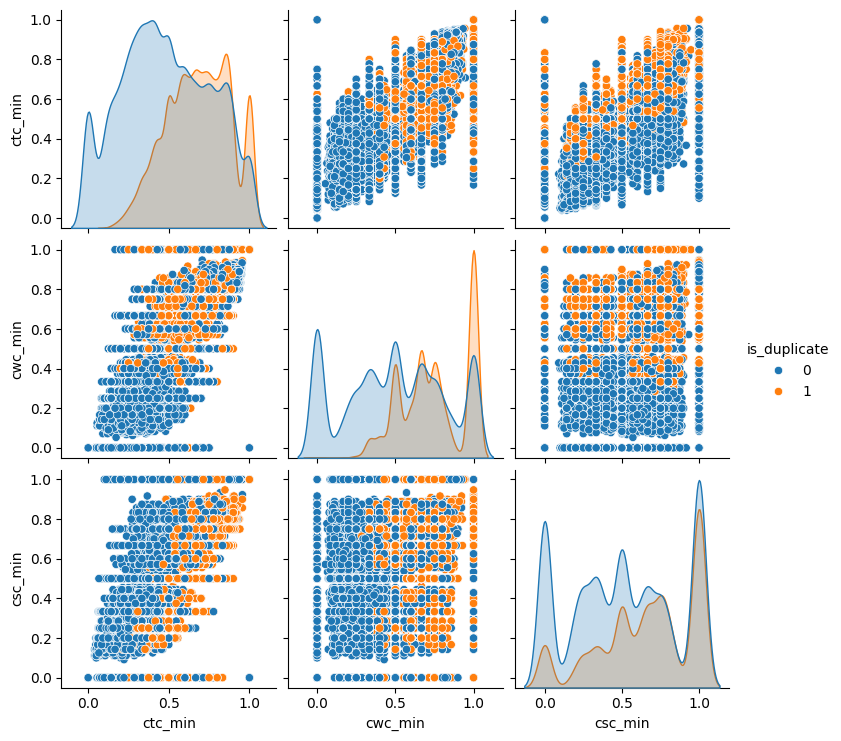

In [ ]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

plt.savefig('token_feature_plots.png')
plt.show()

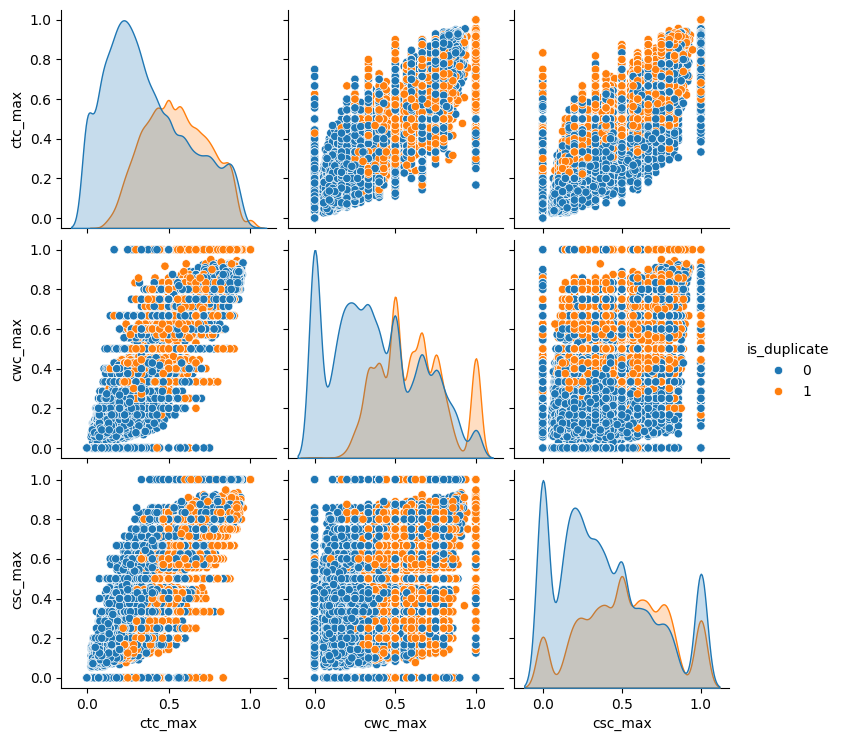

In [ ]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

plt.savefig('token_feature_plots_2.png')
plt.show()

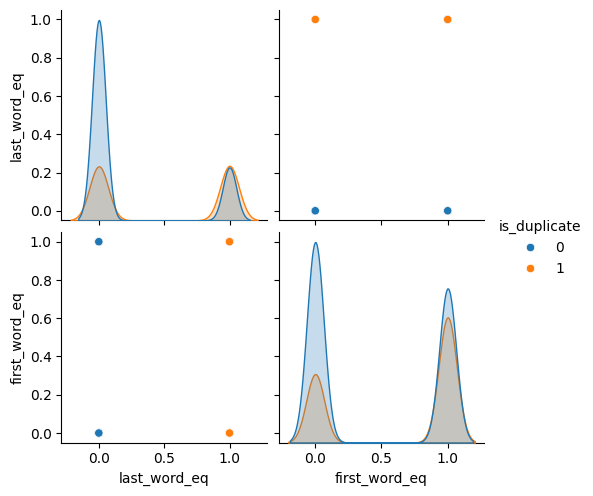

In [ ]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

plt.savefig('length_based_features.png')
plt.show()

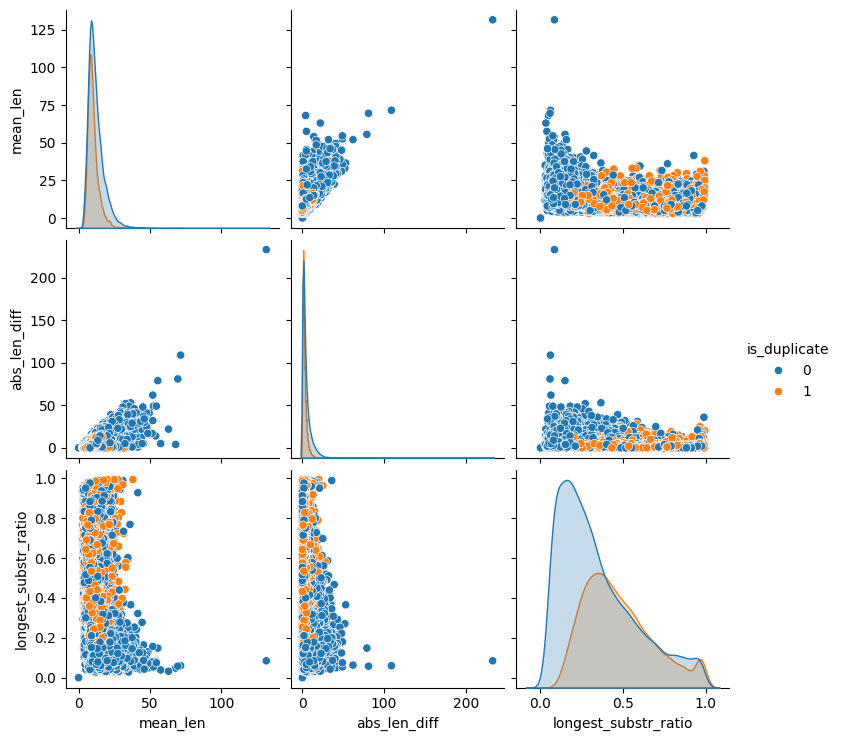

In [ ]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

plt.savefig('length_based_features_2.png')
plt.show()

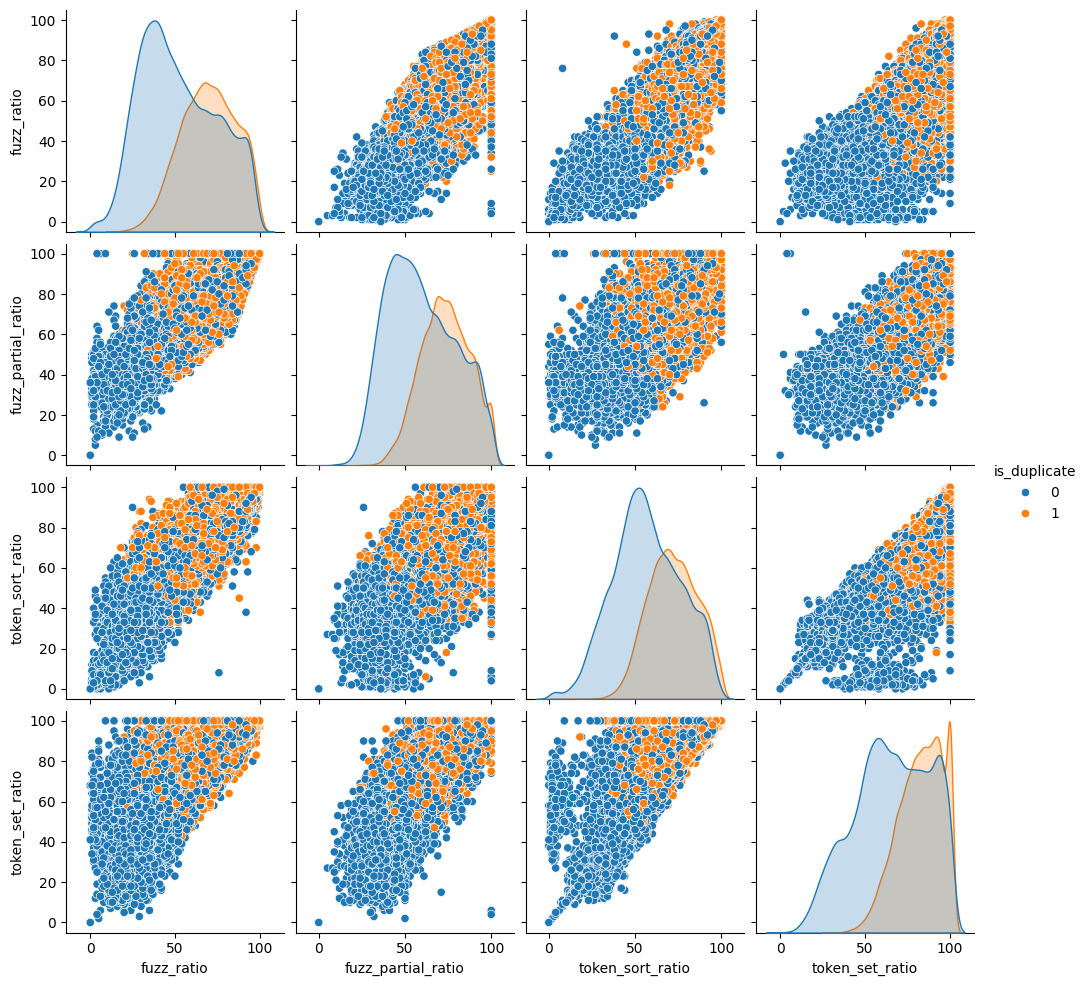

In [ ]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

plt.savefig('Fuzzy_features.png')
plt.show()

In [ ]:
# # Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

# from sklearn.preprocessing import MinMaxScaler

# X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
# y = df['is_duplicate'].values

In [ ]:
# from sklearn.manifold import TSNE

# tsne2d = TSNE(
#     n_components=2,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [ ]:
# x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# # draw the plot in appropriate place in the grid
# sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, aspect=1, palette="Set1", markers=['s','o'])
# plt.savefig('tsne.png')
# plt.show()

In [ ]:
ques_df = df[['question1', 'question2']]
ques_df.head()

,question1,question2
120567,how does the boggart work,what would the boggart of a boggart be
324466,what is difference between project manager and...,what are the differences between project manag...
398558,what hotel in jabalpur would be safe for unmar...,what hotel in allahabad would be safe for unma...
339914,what is stronger super saiyan 4 or super sai...,how does gohan turn into super saiyan 2
185732,how do i fill in address line 1 and address li...,how do i register desired web address


In [ ]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(45000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
120567,0,25,38,5,8,2,12,0.17,0.499975,0.499975,...,0.249997,0.0,0.0,3.0,6.5,0.500000,57,68,57,65
324466,0,62,75,9,10,4,17,0.24,0.249994,0.249994,...,0.399996,0.0,1.0,1.0,9.5,0.365079,76,77,74,76
398558,0,123,124,23,23,18,38,0.47,0.909083,0.909083,...,0.849996,1.0,1.0,0.0,20.0,0.814516,96,95,92,96
339914,0,53,39,12,8,2,17,0.12,0.399992,0.399992,...,0.199998,0.0,0.0,2.0,9.0,0.350000,48,54,49,55
185732,0,50,37,12,7,4,17,0.24,0.249994,0.199996,...,0.333331,0.0,1.0,5.0,9.5,0.236842,46,54,57,60


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=2500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(45000, 5000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(45000, 5023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
120567,0,25,38,5,8,2,12,0.17,0.499975,0.499975,...,0,0,0,0,0,0,0,0,0,0
324466,0,62,75,9,10,4,17,0.24,0.249994,0.249994,...,0,0,0,0,0,0,0,0,0,0
398558,0,123,124,23,23,18,38,0.47,0.909083,0.909083,...,0,0,0,0,0,0,0,0,0,0
339914,0,53,39,12,8,2,17,0.12,0.399992,0.399992,...,0,0,0,0,0,0,0,0,0,0
185732,0,50,37,12,7,4,17,0.24,0.249994,0.199996,...,0,0,0,0,0,0,0,0,0,0


# 7) Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7947777777777778

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7911111111111111

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[4852,  859],
       [ 988, 2301]])

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[4746,  965],
       [ 915, 2374]])

# 8) Prediction

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'


rf.predict(query_point_creator(q1,q4))

array([1])

In [ ]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
! zip -r results_model.zip *.png *.pkl

  adding: Fuzzy_features.png (deflated 1%)
  adding: length_based_features_2.png (deflated 2%)
  adding: length_based_features.png (deflated 7%)
  adding: token_feature_plots_2.png (deflated 1%)
  adding: token_feature_plots.png (deflated 1%)
  adding: cv.pkl (deflated 72%)
  adding: model.pkl (deflated 83%)


In [ ]:
import pickle
from nltk.corpus import stopwords

# Download the stopwords if not already done
import nltk
nltk.download("stopwords")

# Get English stop words
STOP_WORDS = stopwords.words("english")

# Save STOP_WORDS to a pickle file
with open("stopwords.pkl", "wb") as file:
    pickle.dump(STOP_WORDS, file)